#BA765 - Session 09
08/03/2021

###Outline

- Course and Instructor Evaluation
- Assignment Questions?
- Final related Questions?

- More Simulations!
- - Simulating the spread of an infectious disease in a population!!
- - Simulating vaccinations - yay!
- - Simulating coin flip or Possion (exercises from last class)
- - Simulating the "game of life" (locally, on your computer!)
https://media.giphy.com/media/tXlpbXfu7e2Pu/giphy.gif






##Course and Instructor Evaluations
- Consideration should be given to all semester
- Your answers are taken seriously, you might not see the impact but next cohorts will. 
- Not every questions is relevant for every course, e.g. we do not have other instructors (TAs, co-instructors etc)

Link for B1 section:
https://bostonu.qualtrics.com/jfe/form/SV_cHogJMRytURD2DQ?CLASS=BA765B1.Kucukbenli

Link for the B2 section:
https://bostonu.qualtrics.com/jfe/form/SV_cHogJMRytURD2DQ?CLASS=BA765B2.Kucukbenli


## Simulating the spread of Covid19

There are many models that try to simulate the spread of an infectious disease. We will use what is called an **"SIR model"**. It is called this way because of its parameters:

**S**: People who are “susceptible”, i.e. capable of contracting the disease if they come into contact with someone who is infected.

**I**: People who are “infectious”, i.e. capable of passing along the disease if they come into contact with someone susceptible.

**R**: People who were infected but are “recovered”, i.e. immune to reinfection. (this is not true for every disease but let us assume it to be true for our simulation).

For a population of size `N`, we expect `N = S + I + R`

Other parameters of this simulation are:

*gamma*: recovery rate - The probability of recovery for any infected person at a given day

*beta*: contact rate - the probability of any susceptible person to come in contact with others for a given day

*i*: ratio of the population that is infected; 

*s*: ratio of the population that is susceptible to get infected.

*r*: ratio of the population that has recovered.

### Equations that govern the spread:
The total number of susceptible people in the population (N*s) changes every day as they become infected through contact:

$\Delta$(N*s) = - beta * s * N * i

The total number of infected people in the population changes every day as they recover, and as new people get sick:

$\Delta$(N*i) =  (beta * s * N * i) - (gamma * i *N)

The total number of recovered people in the population changes every day as sick people recover:

$\Delta$(N*r) =  gamma * i *N

Now, given these daily change of population health status, can you simulate a population of 100 people, given 1 of them is sick?


### Exercise:
Build a class called `Population()`. Any object that is created from this class should have the following attributes in order for the object to be defined: N, s, i, r ; where N is the total number of people in the population, and s, i, r are the ratios as described above.

This class should have have a method called `simulate_covid` where it should use the SIR model, with the following parameters with given defaults: gamma = 1/8 and beta = 1/2. This method should have a mandatory argument called "duration" that determines the duration of the simulation in terms of days. 

Simulate function should rely on another function defined separately, called `update_daily` where a single day update is performed using the equations above, and the updated object is returned.

The `simulate_covid` method should return a history of the simulation, meaning, three lists that hold the daily numbers for S, I, R in the population. 




In [260]:
#Build your class below in one cell, no other calls please:
  #update short hand
    #i = i - 1
    #i -= 1
    #self.s = self.s -  (b * self.s * self.i)
#imports


class Population():
  
  def __init__(self, s,i,r,N):
    self.s = s
    self.i = i
    self.r = r
    self.N = N

  def update_daily(self, g, b):

    updated_s = self.s - (b * self.s * self.i)
    updated_i = self.i + (b* self.s * self.i) - (g * self.i)
    updated_r = self.r + (g * self.i)
    self.s = updated_s
    self.i = updated_i
    self.r = updated_r

    return

  def simulate_covid(self, duration, gamma= 1/8, beta=1/2):
    hist_S = []
    hist_I = []
    hist_R = []

    for _ in range(duration):
    # run this for every day of the duration:  update_daily(g=gamma, b=beta)
      self.update_daily(g=gamma, b=beta)
      hist_S.append(self.N * self.s)
      hist_I.append(self.N * self.i)
      hist_R.append(self.N * self.r)

    return hist_S, hist_I, hist_R


  


In [261]:
mypop = Population(s = 0.99, i = 0.01, r = 0, N=100)


In [262]:
hist_S, hist_I, hist_R = mypop.simulate_covid(duration=10)

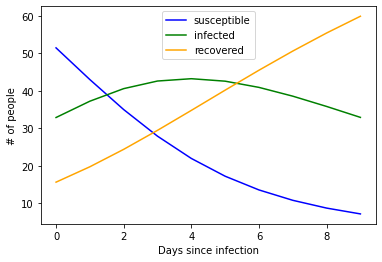

In [120]:
import matplotlib.pyplot as plt
plt.plot(range(len(hist_S)), hist_S, 'b', label='susceptible')
plt.plot(range(len(hist_I)), hist_I, 'g', label='infected')
plt.plot(range(len(hist_R)), hist_R, 'orange', label='recovered')
plt.xlabel("Days since infection")
plt.ylabel("# of people")
plt.legend()
plt.show()


## Simulating the impact of the Vaccination!

Add a new method to your previous class that simulates the effect of the vaccination, called `add_vax`. This function should have an attribute called `vax_fraction` whose default is 0.01. 

The impact of vaccination is that people become immunized before they get sick, (duh!), such that the number of the susceptible people change daily as the following:

$\Delta$(N*s) =  - (beta * s * N * i) - (vax_frac * s * N)

and the "recovered" or better, immunized people number increases correspondingly:

$\Delta$(N*r) =  + (gamma * i * N ) + (vax_frac * s * N)

Build this function separately, but call it within your `update_daily` function, if only the **object** has the optional attribute `vax_avail == True`. The default for the attribute `vax_avail` is `False`.




In [286]:
# Run the same simulation as before. How does your result change?
class Population():
  
  def __init__(self, s,i,r,N):
    self.s = s
    self.i = i
    self.r = r
    self.N = N
  
  def add_vax(self, vax_frac =0.01, vax_avail=False):
    if vax_avail == True:
      updated_s = self.s - ((b * self.s * self.i)-(vax_frac*S*N))
      updated_r = self.r + ((g * self.i) + (vax_frac*S*N))

  def update_daily(self, g, b):
    self.add_vax(vax_frac =0.01, vax_avail=True)
    updated_s = self.s - (b * self.s * self.i)
    updated_i = self.i + (b* self.s * self.i) - (g * self.i)
    updated_r = self.r + (g * self.i)
    self.s = updated_s
    self.i = updated_i
    self.r = updated_r

    return

  def simulate_covid(self, duration, gamma= 1/8, beta=1/2):
    hist_S = []
    hist_I = []
    hist_R = []

    for _ in range(duration):
    # run this for every day of the duration:  update_daily(g=gamma, b=beta)
      self.update_daily(g=gamma, b=beta)
      hist_S.append(self.N * self.s)
      hist_I.append(self.N * self.i)
      hist_R.append(self.N * self.r)

    return hist_S, hist_I, hist_R


In [287]:
mypop = Population(s = 0.99, i = 0.01, r = 0, N=100)

In [288]:
hist_S, hist_I, hist_R = mypop.simulate_covid(duration=10)

NameError: name 'b' is not defined

## Coin Flipping (Anything with Yes/No like outcome)

In [124]:
import numpy as np
# basics
# define success as occurrence of 1
SUCCESS_PROB = .5
np.random.choice([0,1], size=1, p=[1-SUCCESS_PROB, SUCCESS_PROB])

array([0])

In [139]:
# size = 10 = # of trials.  We will refer to this as 1 run of the experiment:
flip = np.random.choice([0,1], size=10, p=[1-SUCCESS_PROB, SUCCESS_PROB])
flip

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 0])

In [143]:
# Sum shows us how many successes in the experiment
flip.sum()

5

In [144]:
# something a little more practical:
# Let's say in professional sports (hockey) 
# 10% of the shots on net result in a goal

# assume all shots are of equal quality

# let's say a goalie faces 1000 shots.  
# How many goals (successes) will they let up?

In [158]:
GOAL_P = .1
shots = np.random.choice([1,0], size=100, p=[GOAL_P, 1-GOAL_P ])
#probability of each outcome  needs to be in same list 
shots[:5]

array([1, 0, 0, 0, 0])

In [159]:
shots[:20]

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [160]:
shots.sum()/len(shots)

0.11

### (Breakout Room) Exercise:

The GM of the Boston Bruins contacted your analytics firm to help understand a shift in strategy they are looking to employ next season.

The team allowed 167 goals last season on 2103 shots.  

Moving forward, the team wants to understand how the following strategy would impact the number of goals allowed:

1.  Shots can be taken from 3 zones, zone A, B and C.
1.  The team wants to employ a strategy to shift where shots are taken from.  They believe that they can restrict their opponents to the following: zone A accounts for 15% of the shots, Zone B accounts for 65% of the shots, and Zone C the remaining 20%
1.  The shot success rates for zone A, B and C are 5%, 10% and 8% respectively
1.  The Bruins expect to allow 2100 shots next season

Run 100 experiments, where for each experiment, there are 2100 shots using the information provided above.

Across the 100 experiments, how many times would the Bruins reduce the number of goals allowed relative to 167 from the prior season?

Would you recommend the strategy?


In [373]:
# many ways to do this
# break the problem down
# for each shot, we need to pick a zone, and then associate the probability of the shot going in
# each experiment will have 2100 shots
# will run 100 experiments
avg_ga = 167
exp_shots = 10
GOAL_A = .05
GOAL_B = .1
GOAL_C = .08
prob_a  = 0.15
prob_b = 0.65
prob_c = 0.2
shot_choice = np.random.choice(["A","B","C"], size=exp_shots, p=[prob_a, prob_b, prob_c])





#season_results = []
#for _ in range(100):
    #less_avg_ga =Total_GA[Total_GA<avg_ga]
    #season_results.append(len(less_avg_ga)/100)











    




In [374]:
c_zone

['C', 'C']

In [297]:
import numpy as np

def goal_sim(n=100,shots=2100):

  average_goals_allowed = 167

  #Probability of a given zone being chosen
  P_zone_A = 0.15
  P_zone_B = 0.65
  P_zone_C = 0.2

  #Probability of successful goal from a given zone 
  S_zone_A = 0.05
  S_zone_B = 0.10
  S_zone_C = 0.08

  #Setup zone shot sequence
  zone_list = ['A','B','C']
  zone = np.random.choice(zone_list,size=shots,p=(P_zone_A,P_zone_B,P_zone_C))

  #Set up goal simulation
  goal_ct_list = []
  i = 0
  while i < n:
    results = []
    for _ in zone:
      if _ == 'A':
        prob = S_zone_A
      elif _ == 'B':
        prob = S_zone_B
      elif _ == 'C':
        prob = S_zone_C
      goal = np.random.choice((0,1),p=(1-prob,prob))
      results.append(goal)
    results = np.array(results)
    goal_ct = sum(results)
    goal_ct_list.append(goal_ct)
    i += 1
  goal_avg = np.average(goal_ct_list)
  below_avg = 0
  for _ in goal_ct_list:
    if _ < average_goals_allowed:
      below_avg += 1
  if below_avg >= n/2:
    msg = "This appears to be a good strategy! The total number of games below the avg. goals allowed per game is {} out of {}. The mean goals allowed in the simulation is {}.".format(below_avg,n,goal_avg)
  else:
    msg = "This does not appear to be a good strategy. The total number of games below the avg. goals allowed per game is {} out of {}. The mean goals allowed in the simulation is {}.".format(below_avg,n,goal_avg)
  
  return msg

NameError: name 'zone' is not defined

## Poisson Distribution 

Let's say we want to know the probability of independent events occuring on a fixed time interval, and we are interested in the probability of a fixed number of events occuring at that interval.  We can model this with the Poisson distribution.

https://en.wikipedia.org/wiki/Poisson_distribution


In [ ]:
# visitors to your website in a given day
# expected value, # of trials


np.random.poisson(1200)

1187

In [ ]:
# let's simulate for a week, and then a year
week = np.random.poisson(1200, 7)
year = np.random.poisson(1200, 365)
print(week)
#print(year)

[1238 1251 1173 1226 1230 1177 1215]


(array([ 5., 13., 50., 69., 76., 83., 43., 14.,  9.,  3.]),
 array([1107. , 1127.5, 1148. , 1168.5, 1189. , 1209.5, 1230. , 1250.5,
        1271. , 1291.5, 1312. ]),
 <a list of 10 Patch objects>)

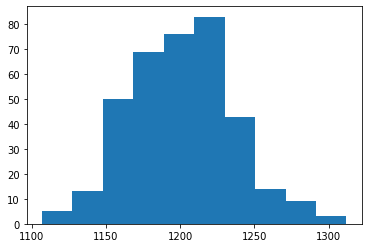

In [ ]:
# lets do a quick plot
# you will dive much deeper into plotting in your next course
plt.hist(year)

In [ ]:
# Example

# A cafe owner contacted your analytics firm to help understand capacity

# In a given week, they sell 1250 bagels that are baked in-house
# They will lose money if they do not have enough ingredients to satisfy demand

# Over a 52 week period, how many weeks can they expect to sell 1300 or more bagels?

bagels = np.random.poisson(1250, 52)
plt.hist(bagels)

### (Breakout Room) Exercise

The same cafe owner from above has re-engaged your analytics firm to help estimate employee expenses which are a function of the number of orders.  

1.  The cafe is open 252 days a year
1.  On average, they have 2200 orders a day
1.  The owner has estimated that they need 1 employee for every 300 orders
1.  The daily cost for an employee is $125/day

Simulate this exercise 100 times.  What is the average annual employee cost?

## Exercise: Game of Life

This will only work on your local machine, it is a famous exercise, which also comes up in coding interviews. 

https://playgameoflife.com/


In [ ]:
# Python code to implement Conway's Game Of Life
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# setting up the values for the grid
ON = 255
OFF = 0
vals = [ON, OFF]

def randomGrid(N):

	"""returns a grid of NxN random values"""
	return np.random.choice(vals, N*N, p=[0.2, 0.8]).reshape(N, N)

def addGlider(i, j, grid):

	"""adds a glider with top left cell at (i, j)"""
	# ??

def update(frameNum, img, grid, N):
 
	newGrid = grid.copy()
	for i in range(N):
		for j in range(N):

			# compute how many neighbour we have
			total_neigh = 

			# apply Conway's rules
			if grid[i, j] == ON:
				# ??
      else:
				# ??

	# update data
	img.set_data(newGrid)
	grid[:] = newGrid[:]
	return img,

# the main function that actually simulates the game of life:
def game_of_life(N=50):
	
	# check that grid size is integer and larger than 3
		
	# set animation update interval
  # this is about the display so you don't need to change
	updateInterval = 50

	# declare grid
	grid = np.array([])

	# populate grid with random on/off -
  # more off than on
	grid = randomGrid(N)

	# set up animation
	fig, ax = plt.subplots()
	img = ax.imshow(grid, interpolation='nearest')
	ani = animation.FuncAnimation(fig, update, fargs=(img, grid, N, ),
								frames = 10,
								interval=updateInterval,
								save_count=50)
 
	plt.show()


In [ ]:
game_of_life(100)

In [ ]:
q1_1 = [1,3,5]

In [ ]:
q1_1

[1, 3, 5]